# Tempo Tracking
The objective of this note book is to explore different methods on how to track the tempo of a music. Eventually we would like to use this in evaluating the tempo of a DJ performance. This will enbale us in analyzing "How shoulf the tempo of a DJ set change over time?".



In [43]:
import os 
import msaf
import librosa
import matplotlib.pyplot as plt
import numpy as np



In [5]:
y, sr = librosa.load('cse.wav', offset=90, duration=90)


In [9]:
hop_length = 200 # samples per frame
onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length, n_fft=2048)

In [10]:
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

Text(0.5, 1.0, 'Novelty Function')

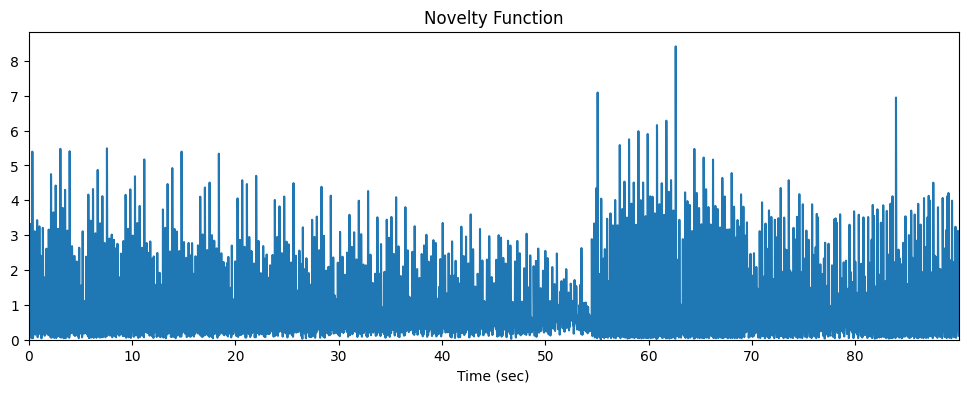

In [14]:
# set the figure size
plt.figure(figsize=(12, 4))
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Tempo Curve')

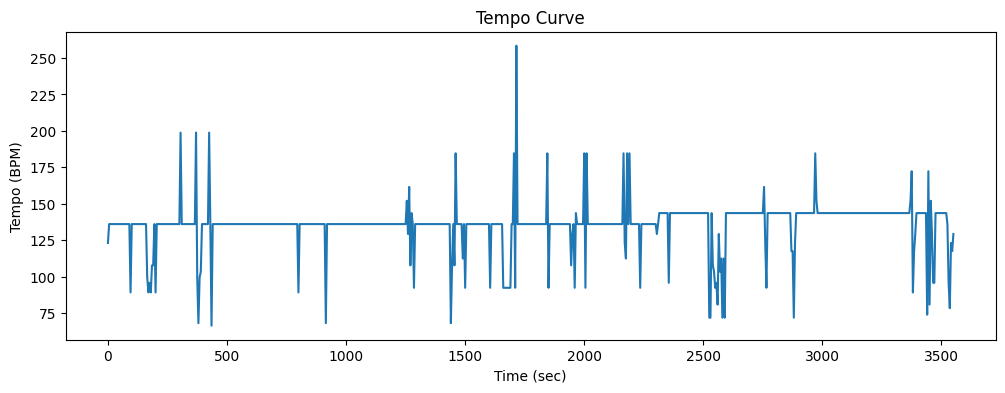

In [25]:
song_path = "/Users/nimamanaf/Desktop/Music/Amber Broos  Tomorrowland 2023  Mainstage.WAV"

# load the audio
y, sr = librosa.load(song_path)


In [68]:
def get_sliding_tempo(y, sr, window_size=30, window_step=5):
    """
    This function calculates the tempo every 10 seconds with an sliding window of 5 seconds.
    :param y: audio time series
    :param sr: sampling rate of `y`
    :param window_size: size of the window in seconds
    :param window_step: step of the window in seconds
    :return: a list of tuples with the tempo and the time in seconds
    """
    # get the total time of the track in seconds
    total_time = librosa.get_duration(y=y, sr=sr)
    # calculate the number of windows 
    num_windows = int(np.ceil((total_time - window_size) / window_step))
    # initialize the list of tuples
    tempo_list = []
    # iterate over the windows
    for i in range(num_windows):
        # get the start and end time of the window
        start = i * window_step
        end = start + window_size
        # calculate the tempo
        tempo = librosa.beat.beat_track(y=y[start*sr:end*sr], sr=sr)[0]
        # append the tuple
        tempo_list.append((tempo, start))
    return tempo_list


def plot_tempo(y, sr, title="", window_size=20, window_step=10):
    """
    This function plots the tempo every 10 seconds with an sliding window of 5 seconds.
    :param y: audio time series
    :param sr: sampling rate of `y`
    :param window_size: size of the window in seconds
    :param window_step: step of the window in seconds
    """
    # get the tempo list
    tempo_list = get_sliding_tempo(y, sr, window_size, window_step)
    # get the total time of the track in seconds
    total_time = librosa.get_duration(y=y, sr=sr)
    # get the time of the tempos
    times = [t[1] for t in tempo_list]
    # get the tempos
    tempos = [t[0] for t in tempo_list]
    # plot the tempos
    plt.figure(figsize=(12, 4))
    plt.plot(times, tempos)
    # put 60 tick marks in the x axis 
    step = np.ceil(total_time/(60*60))
    plt.xticks(np.arange(0, total_time, step=step*60), np.arange(0, total_time/60, step=step,dtype=int), rotation=90)
    plt.xlabel('Time (min)')
    plt.ylabel('Tempo (BPM)')
    plt.title(title)

    # Add mean tempo line and label 
    mean_tempo_label = "Median Tempo: {:.1f} BPM".format(np.median(tempos))
    plt.axhline(y=np.median(tempos), color='r', linestyle='--', label=mean_tempo_label)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

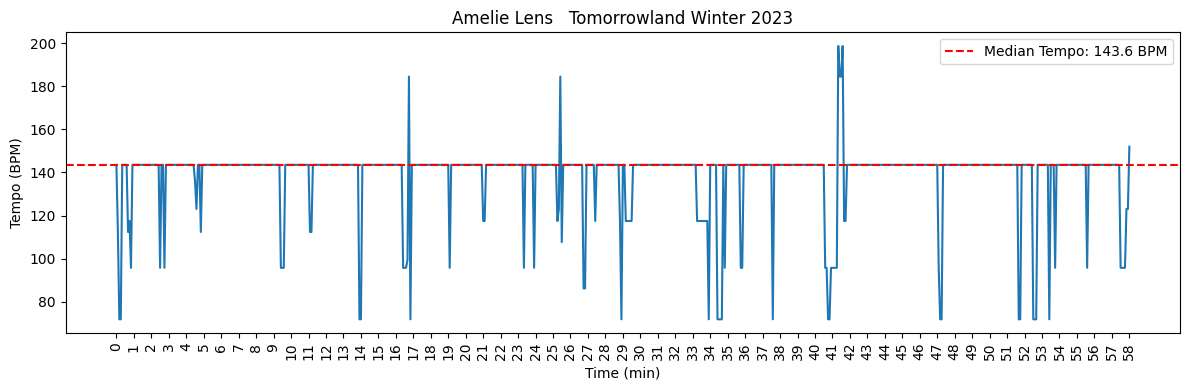

In [72]:
song_name = "Amelie Lens   Tomorrowland Winter 2023.WAV"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music", song_name)

# load the audio
y, sr = librosa.load(song_path)

plot_tempo(y, sr, title=song_name.split(".")[0], window_size=10, window_step=5)

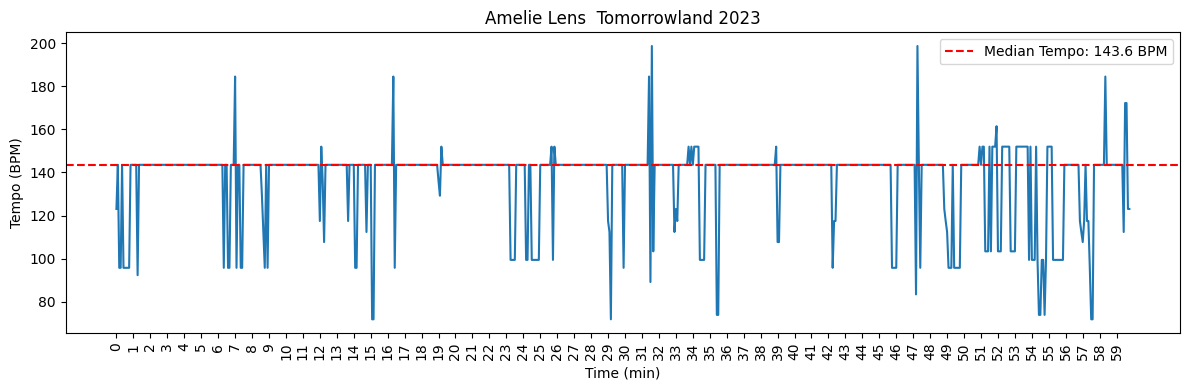

In [71]:
song_name = "Amelie Lens  Tomorrowland 2023.wav"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music", song_name)

# load the audio
y, sr = librosa.load(song_path)

plot_tempo(y, sr, title=song_name.split(".")[0], window_size=10, window_step=5)

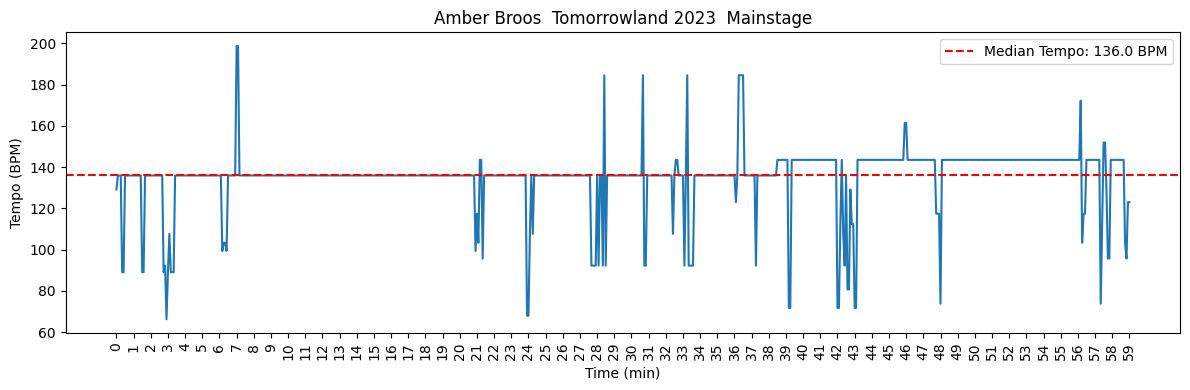

In [70]:
song_name = "Amber Broos  Tomorrowland 2023  Mainstage.WAV"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music", song_name)

# load the audio
y, sr = librosa.load(song_path)
plot_tempo(y, sr, title=song_name.split(".")[0], window_size=10, window_step=5)



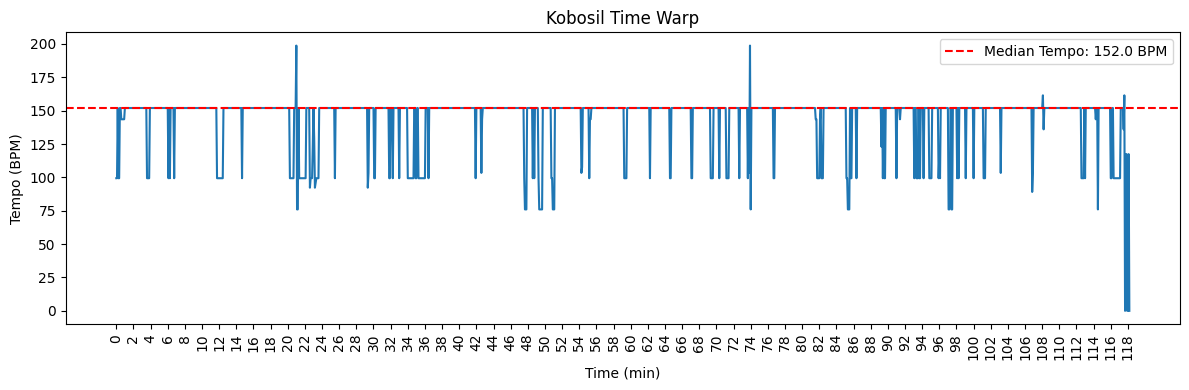

In [73]:
song_name = "Kobosil.WAV"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music", song_name)

# load the audio
y, sr = librosa.load(song_path)
plot_tempo(y, sr, title="Kobosil Time Warp", window_size=10, window_step=5)


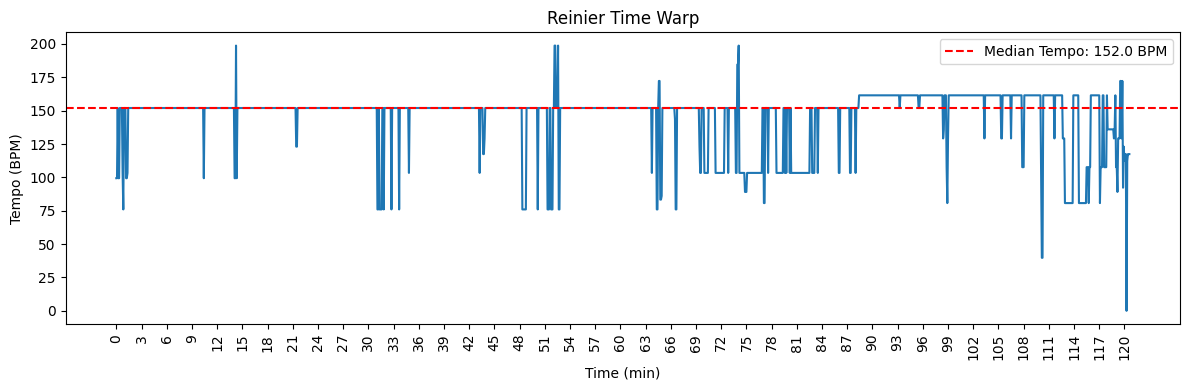

In [74]:
song_name = "Reinier Zonneveld (live) - Time Warp 2023 - @arteconcert.wav"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music/Reiner Zonneveld - Time Warp 2023", song_name)

# load the audio
y, sr = librosa.load(song_path)
plot_tempo(y, sr, title="Reinier Time Warp", window_size=10, window_step=5)



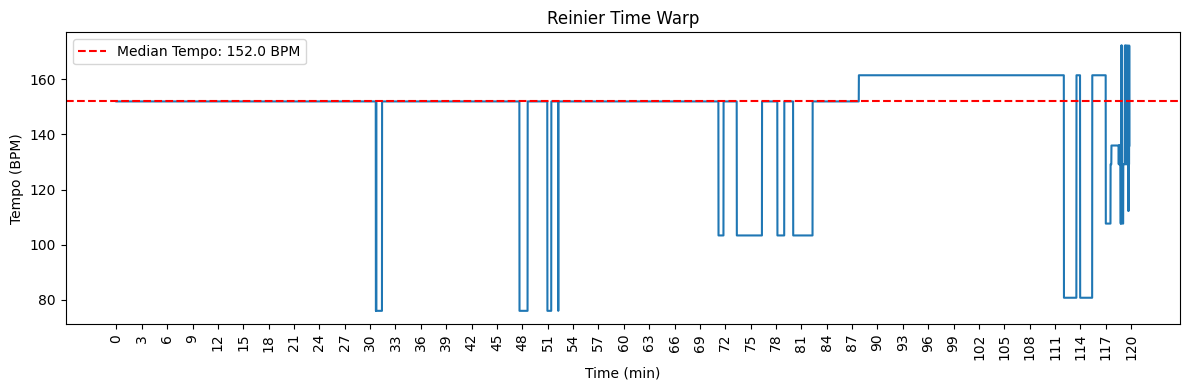

In [75]:
song_name = "Reinier Zonneveld (live) - Time Warp 2023 - @arteconcert.wav"
song_path = os.path.join("/Users/nimamanaf/Desktop/Music/Reiner Zonneveld - Time Warp 2023", song_name)

# load the audio
y, sr = librosa.load(song_path)
plot_tempo(y, sr, title="Reinier Time Warp", window_size=60, window_step=1)